In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from detector import cargar, get_face, predict, show_yes
import warnings
warnings.filterwarnings("ignore")


modelo1, modelo2, emotions = cargar()


In [4]:
path = "../data/em-testing"
archivos = [f for f in os.listdir(path) if f.endswith(".png")]

In [5]:
def probar_imagen(ruta,modelo1, modelo2, emotions):

    image = cv2.imread(ruta)
    img_bgr = image.copy()

    val = 9
    face, coords = None, None
    while face is None and val >= 0:
        face, coords = get_face(image, val, modelo1)
        val -= 1

    if face is not None and coords is not None:
        pred = predict(modelo2, face, emotions)
        show_yes(img_bgr, coords, pred)

    img_original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_pred = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img_original)
    plt.axis('off')
    plt.title("Original")

    plt.subplot(1,2,2)
    plt.imshow(img_pred)
    plt.axis('off')
    plt.title("Con predicción")

    plt.show()


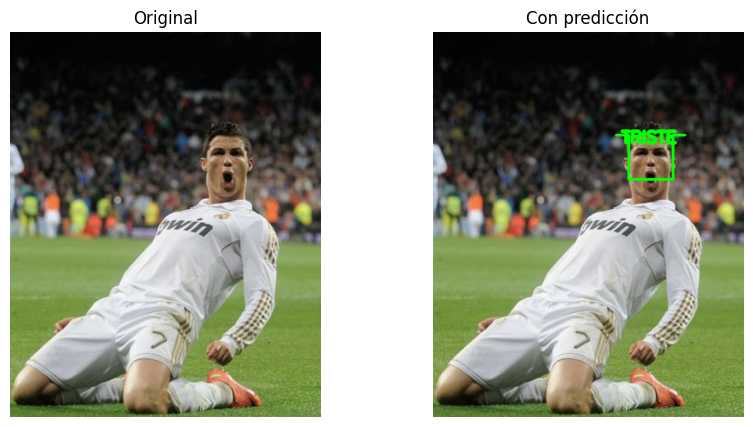

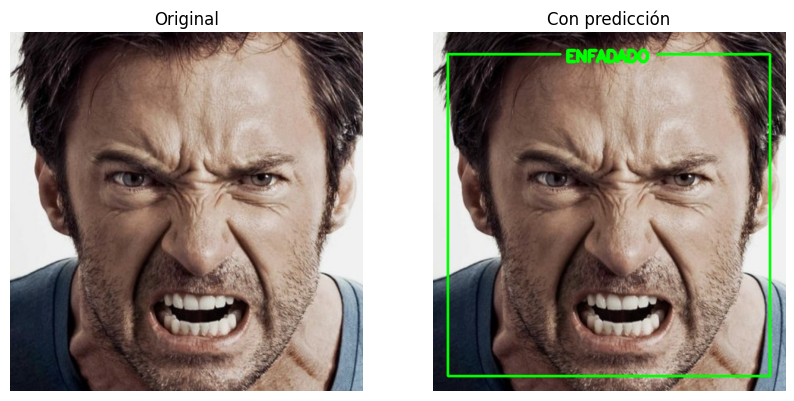

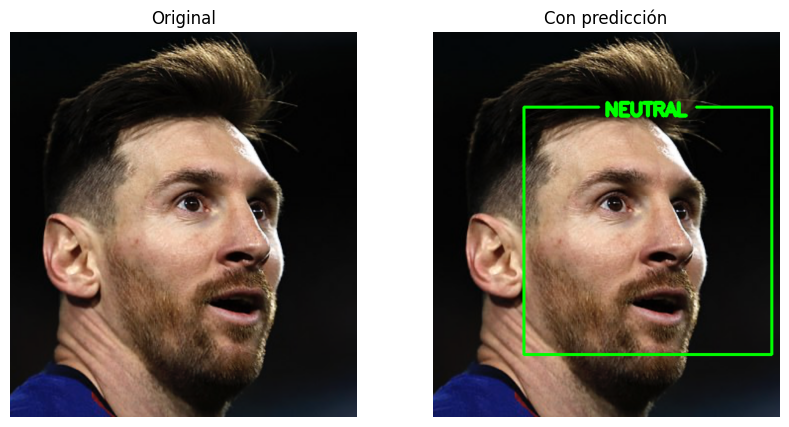

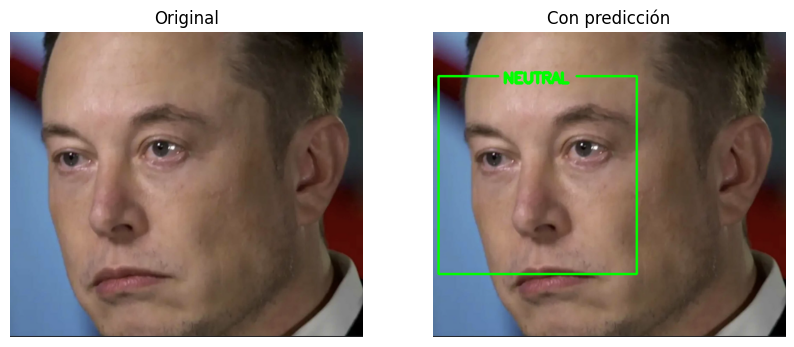

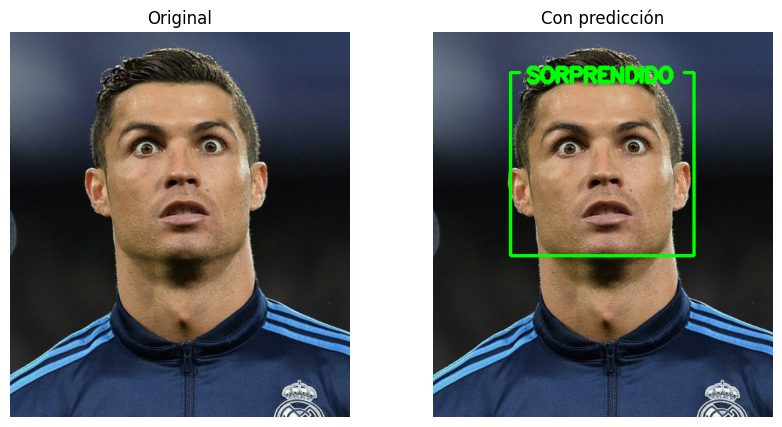

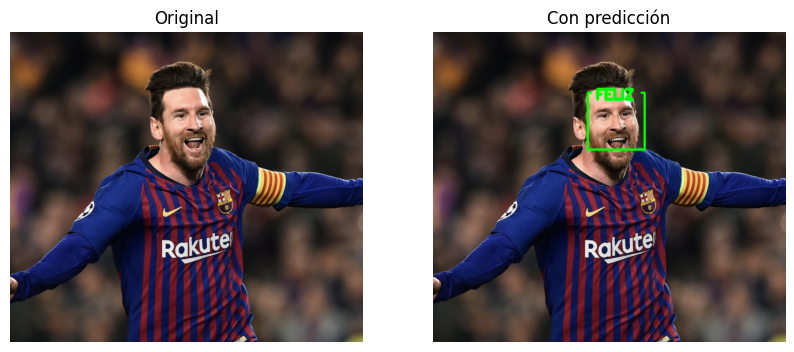

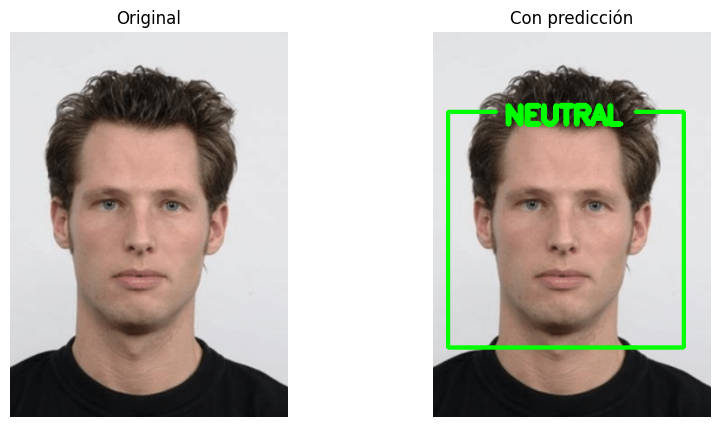

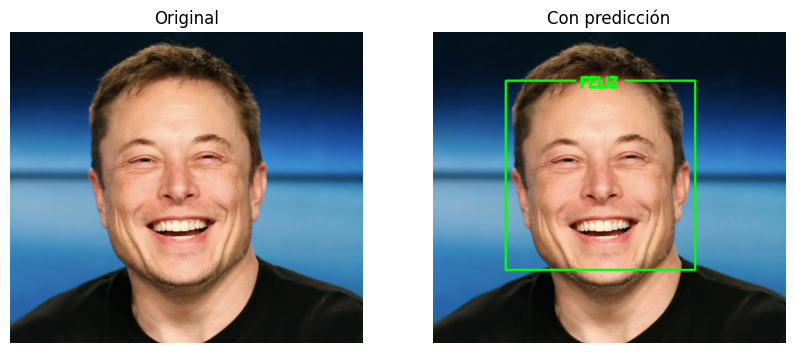

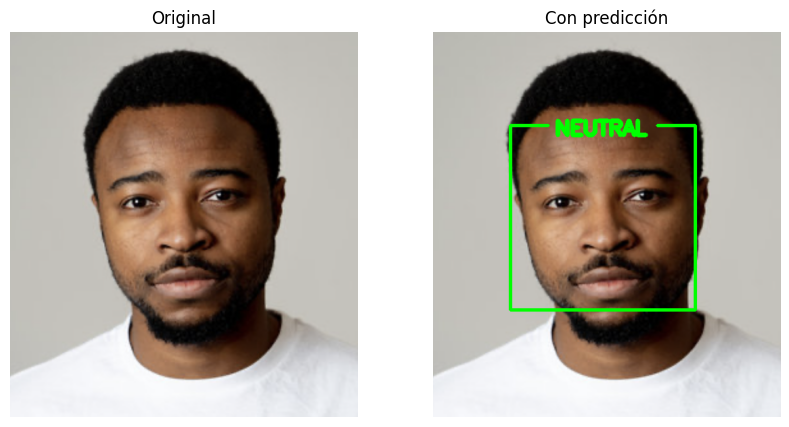

In [6]:
for path_img in archivos:
    probar_imagen(os.path.join(path, path_img), modelo1, modelo2, emotions)